In [1]:
## CORREÇÃO ###

# Comentários: -

# Acerto da questão:
acc = 100

# Nota da questão:
nota+= acc
questoes += 1

print("Número de questões %d." % questoes)
print("Nota: %.1f" % (nota/(questoes*10)))

NameError: ignored

# Aula 03 - Exercício 02
## Aproximação de funções (Regressão)

Para esse exercício, carregue a base de dados `teste1.txt`. Os dados possuem 14 variáveis, organizados em 14 colunas. A 15ª coluna representa o valor da função. Os dados estão separados pelo caractere `\t`.


Note que os dados não podem ser lidos linha a linha, pois existem linhas que foram quebradas antes das 14 variáveis serem descritas.

* Leia os dados e armazene-os em uma tabela.
  * Dica: Converta sua tabela em uma estrutura do tipo pandas.DataFrame





In [2]:
import pandas as pd
fh = open('test1.txt')
dh = open('test1_prep.txt', 'w')
curr_line = 1

line_acc = ""
concat = False
for line in fh:
    if curr_line == 1:        
        dh.write(line[1:])
    if curr_line >= 4:
        if concat:
            concat = False            
            dh.write(line_acc.replace('\n', '') + line)
        elif line.count('\t') < 14:
            line_acc = line
            concat = True
        else:
            dh.write(line)
    curr_line+=1
fh.close()
dh.close()

data = pd.read_csv("test1_prep.txt", sep="\t", header=0)
print(data.shape)

(464, 15)




---

*   Calcule a matriz de correlação dos dados e escolha a variável mais relevante.
  
* Dica 1: Se os dados estiverem em formato de DataFrame da biblioteca pandas, basta fazer dataset.corr() para gerar a matriz de correlação. Para facilitar ainda mais a visualização, você pode utilizar a função heatmap da biblioteca seaborn, passando o parâmetro a matriz de correlação calculada e `annot=True` para exibir os valores no heatmap.
* Dica 2: Se o heatmap estiver muito pequeno, é possível alterar o tamanho padrão das figuras do matplotlib, através do comando `plt.rcParams['figure.figsize'] = [w, h]`, onde` [w, h]` é a largura/altura da imagem respectivamente (um tamanho bom para leitura é 10 e 5)

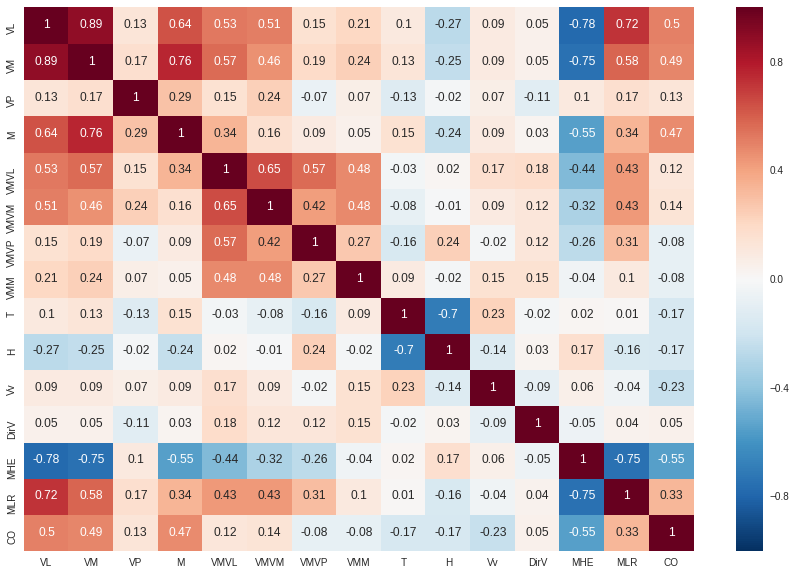

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = [15, 10]

correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


### RESPOSTA

MHE é a variável que apresenta maior correlação em módulo com CO e portanto será escolhida





---



*   Com base na variáveis escolhida via matriz de correlação, aproxime a função por uma reta e calcule seu erro quadrático médio

* Dica 1: Utilize os pacotes importados para realizar a aproximação por função linear e para calcular o erro quadrático médio. 
* Dica 2: Para criar um novo conjunto com a variável selecionada,  inicialize um `DataFrame()` do pandas passando como parâmetro as colunas do DataFrame original concatenadas com a função `_c` da biblioteca numpy: 

```python
pandas.DataFrame(numpy.c_[dataSet['Variavel 1'], dataSet['Variavel 2']], columns = ['Variavel 1', 'Variavel 2'])
```





In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data['MHE'].values.reshape(-1,1)
Y = data['CO']

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
mse = mean_squared_error(Y, Y_pred)

print("Erro quadratico médio: %.2f" % mse)

Erro quadratico médio: 5.97




---



*  Agora calcule uma aproximação por uma função quadrática. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear ou via função quadrática

  * Dica: Utilize a biblioteca já importada para *transformar* os dados para uma regressão polinomial (func. quadrática). Mais informações sobre como o processo podem ser encontradas dentro da pasta do projeto.



In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X2 = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X2, Y)
Y_pred = poly_model.predict(X2)

mse = mean_squared_error(Y, Y_pred)

print("Erro quadratico médio para 2 variáveis com função quadrática: %.2f" % mse)

Erro quadratico médio para 2 variáveis com função quadrática: 5.70


### Resposta

A função quadrática apresenta menor erro quadrático médio (5.7 contra 5.97)



---



*   Por fim, calcule uma aproximação por uma função cúbica. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear, via função quadrática ou via função cúbica.


In [12]:
poly_features = PolynomialFeatures(degree=3)

X3 = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X3, Y)
Y_pred = poly_model.predict(X3)

mse = mean_squared_error(Y, Y_pred)

print("Erro quadratico médio para 3 variáveis com função cúbica: %.2f" % mse)

Erro quadratico médio para 3 variáveis com função cúbica: 5.60


### Resposta

A função cúbica apresenta menor erro quadrático médio entre as 3 métricas avaliadas (5.6 contra 5.7 e 5.97)